# PYBER DATA ANALYSIS

*Despite lower fare (6.8%) and driver (2.6%) percentages in rural cities, rural areas did yield the highest average 
fare amounts ($30-45). Of note, the bulk of rural city fare averages were equal to their suburban counterparts. 

*Although urban cites boast the majority of rides per city (68.4%), their average fare amounts were the lowest of the
three groups. 

*The majority of Pyber drivers work in urban cities (80.9%).

In [94]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

combined_data_df = pd.merge(ride_data_df, city_data_df, how = 'outer',
                                 on='city')

# Display the data table for preview
combined_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


Urban Only Data

In [95]:
# create urban only DF

only_urban = combined_data_df.loc[combined_data_df["type"] == "Urban", :]
only_urban_grouped = only_urban.groupby(['city'])

# urban only calculations

urban_rides_per_city = only_urban_grouped['ride_id'].count()
urban_avgfare_per_city = round(only_urban_grouped['fare'].mean(),2)
driver_count_urban = only_urban_grouped['driver_count'].count()

Suburban Only Data

In [96]:
# create suburban only DF
only_suburban = combined_data_df.loc[combined_data_df["type"] == "Suburban", :]
only_sub_grouped = only_suburban.groupby(['city'])

# suburban only calculations 
sub_rides_per_city = only_sub_grouped['ride_id'].count()
sub_avgfare_per_city = round(only_sub_grouped['fare'].mean(),2)
driver_count_sub = only_sub_grouped['driver_count'].count()

Rural Data Only 

In [97]:
# create rural only DF
only_rural = combined_data_df.loc[combined_data_df["type"] == "Rural", :]
only_rural_grouped = only_rural.groupby(['city'])

# rural only calculations

rural_rides_per_city = only_rural_grouped['ride_id'].count()
rural_avgfare_per_city = round(only_rural_grouped['fare'].mean(),2)
driver_count_rural = only_rural_grouped['driver_count'].count()

## Bubble Plot of Ride Sharing Data

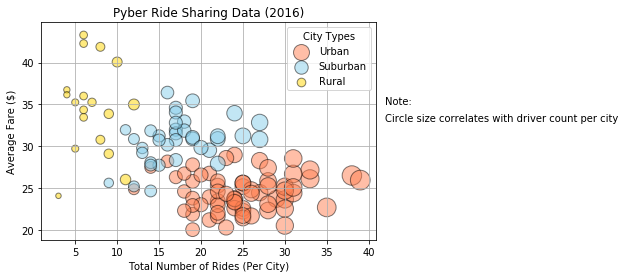

In [98]:
# Build the scatter plots for each city types
Urban = plt.scatter(urban_rides_per_city, urban_avgfare_per_city, marker="o", s=10*driver_count_urban, 
        edgecolors = "black", facecolors ="coral", alpha=0.50, label = 'Urban')
Suburban = plt.scatter(sub_rides_per_city, sub_avgfare_per_city, marker="o", s =10*driver_count_sub, 
           edgecolors = "black", facecolors ="skyblue", alpha=0.50, label = 'Suburban')
Rural = plt.scatter(rural_rides_per_city, rural_avgfare_per_city, marker="o", s =10*driver_count_rural, 
        edgecolors = "black", facecolors ="gold", alpha=0.50, label = 'Rural')

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend

plt.legend(title="City Types")
plt.legend

# Incorporate a text label regarding circle size

plt.text(42,35,'Note:')
plt.text(42,33,'Circle size correlates with driver count per city')

# Save Figure
plt.savefig("Images/BubblePlot.png")

# Show Figure
plt.show()


## Total Fares by City Type

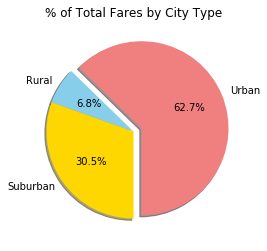

In [99]:
# create fare DF 
fare_group = combined_data_df[['city','type','fare']]
grouped_fare = fare_group.groupby('type')

# get fare calculations
fare_totals = grouped_fare['fare'].sum()
total_fare = fare_group['fare'].sum()
fare_percent = fare_totals/total_fare * 100

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [62.6, 6.8, 30.4,]
colors = ["lightcoral", "skyblue", "gold"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/TotalFaresByCity.png")

# Show Figure 
plt.show()

## Total Rides by City Type

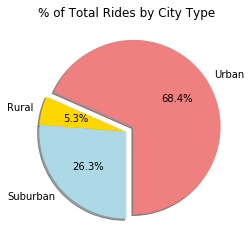

In [100]:
# Calculate Ride Percents

type_count = combined_data_df['type'].value_counts()
ride_percentage = combined_data_df['type'].value_counts()/combined_data_df['type'].count()*100

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [68.4, 5.3, 26.3]
colors = ["lightcoral", "gold", "lightblue"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/TotalRidesByCity.png")

# Show Figure 

plt.show()

## Total Drivers by City Type

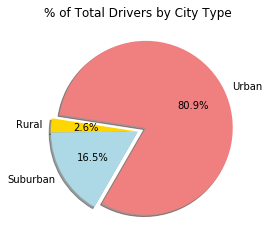

In [101]:
# create driver DF 
driver_group = combined_data_df[['city','type','driver_count']]
unique_driver_group = driver_group.drop_duplicates()
grouped_driver = unique_driver_group.groupby('type')

# Calculate Driver Percents
group_totals = grouped_driver['driver_count'].sum()
driver_total = unique_driver_group['driver_count'].sum()
driver_percent = group_totals/driver_total * 100

# Build Pie Charts

labels = ["Urban", "Rural", "Suburban"]
sizes = [80.9, 2.6, 16.5]
colors = ["lightcoral", "gold", "lightblue"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)

plt.title("% of Total Drivers by City Type")

# # Save Figure
plt.savefig("Images/TotalDriversByCity.png")
plt.show()